Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:01<00:00, 5.73MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 503kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.43MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 6.90MB/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



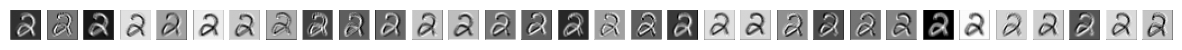

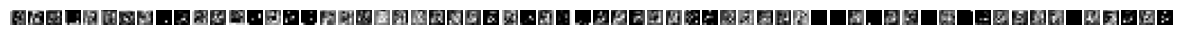

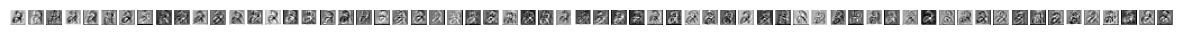

In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

# تعریف مدل CNN
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))  # اولین کانولوشن و پولینگ
        x = self.pool(torch.relu(self.conv2(x)))  # دومین کانولوشن و پولینگ
        x = x.view(-1, 64 * 7 * 7)  # تخت کردن برای ورودی به لایه‌های کاملاً متصل
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# تنظیمات پیش‌پردازش داده‌ها
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # نرمال‌سازی تصاویر
])

# بارگذاری دیتاست MNIST
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# بارگذاری یک تصویر نمونه از دیتاست
data_iter = iter(DataLoader(trainset, batch_size=1, shuffle=True))
images, labels = next(data_iter)

# تعریف مدل CNN
model = CNNModel()

# اضافه کردن hook برای استخراج فیچر مپ‌ها
feature_maps = {}
def hook_fn(module, input, output):
    feature_maps[module] = output  # ذخیره فیچر مپ در هر لایه

# اضافه کردن hook‌ها به لایه‌های کانولوشنی و پولینگ
hook1 = model.conv1.register_forward_hook(hook_fn)
hook2 = model.conv2.register_forward_hook(hook_fn)
hook3 = model.pool.register_forward_hook(hook_fn)

# اجرای مدل روی یک تصویر نمونه
with torch.no_grad():
    model(images)

# حذف hook‌ها پس از استخراج فیچر مپ‌ها
hook1.remove()
hook2.remove()
hook3.remove()

# نمایش فیچر مپ‌ها
def plot_feature_maps(feature_maps):
    for layer, fmap in feature_maps.items():
        fmap = fmap.squeeze(0)  # حذف ابعاد اضافی
        num_feature_maps = fmap.size(0)
        fig, axes = plt.subplots(1, num_feature_maps, figsize=(15, 15))
        if num_feature_maps == 1:
            axes = [axes]
        for i in range(num_feature_maps):
            axes[i].imshow(fmap[i].cpu().numpy(), cmap='gray')
            axes[i].axis('off')
        plt.show()

# نمایش فیچر مپ‌ها
plot_feature_maps(feature_maps)
